In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [44]:
def gaussian(x, mean, std_dev):
    return (1 / (std_dev * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std_dev) ** 2)

In [57]:
def plot_gaussian_distribution(dataframe, model_name):
    fig, ax = plt.subplots(figsize=(10, 6))

    for idx, (min_support, group) in enumerate(dataframe.groupby('Minimum Support')):
        std_dev = group['Match Percentage'].std()
        mean_match_percentage = dataframe[dataframe['Minimum Support'] == min_support]['Match Percentage'].mean()

        if not (idx + 1) % 5 == 0 or np.isnan(std_dev):
            continue

        x = np.linspace(0, 100, 1000)
        y = gaussian(x, mean_match_percentage, std_dev)

        ax.plot(x, y, label=f'Support range: {min_support} - {min_support + 20}')
        ax.fill_between(x, y, alpha=0.1)

    ax.set_title(f'Gaussian Distribution of Equation Match Percentage for {model_name}')
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    ax.set_xlabel('Equation Match Percentage')
    ax.set_ylabel('Probability Density')

    return fig

In [79]:
def plot_mean_match_percentage(evaluation_summary):
    filtered_df = evaluation_summary[
        (evaluation_summary['Minimum Support'].between(-30, 10)) & 
        ((evaluation_summary['Maximum Support'] - evaluation_summary['Minimum Support']) == 20)
    ]

    mean_match_percentages = filtered_df.groupby(['Minimum Support', 'Model'])['Match Percentage'].mean().reset_index()

    fig, ax = plt.subplots(figsize=(10, 6))

    for model in mean_match_percentages['Model'].unique():
        model_data = mean_match_percentages[mean_match_percentages['Model'] == model]
        ax.plot(model_data['Minimum Support'], model_data['Match Percentage'], label=model)

    ax.set_xlabel('Minimum Support')
    ax.set_ylabel('Mean Match Percentage')
    ax.set_title('Mean Match Percentage for Different Models')
    ax.legend()

    return fig

In [46]:
evaluation_path = '../evaluation/'
evaluation_summary_path = f'{evaluation_path}evaluation_summary.csv'

evaluation_summary = pd.read_csv(evaluation_summary_path)

In [47]:
evaluation_summary.head()

,Model,Dataset,Skeleton Encoder Layers,Loss Version,Minimum Support,Maximum Support,Total Entries,Match Sum,Match Percentage
0,mmsr,train_nc,NaN,NaN,-30,-10,228,17,7.456140
1,mmsr,train_nc,NaN,NaN,-29,-9,228,11,4.824561
2,mmsr,train_nc,NaN,NaN,-28,-8,228,14,6.140351
3,mmsr,train_nc,NaN,NaN,-27,-7,229,20,8.733624
4,mmsr,train_nc,NaN,NaN,-26,-6,230,24,10.434783


In [48]:
mmsr_newloss_eval = evaluation_summary[evaluation_summary['Model'] == 'mmsr_se5_newloss']
mmsr_newloss_eval.head()

,Model,Dataset,Skeleton Encoder Layers,Loss Version,Minimum Support,Maximum Support,Total Entries,Match Sum,Match Percentage
43,mmsr_se5_newloss,train_nc,5.0,new,-24,-4,234,43,18.376068
44,mmsr_se5_newloss,train_nc,5.0,new,-24,-4,233,45,19.313305
45,mmsr_se5_newloss,train_nc,5.0,new,-24,-4,234,42,17.948718
46,mmsr_se5_newloss,train_nc,5.0,new,-24,-4,234,43,18.376068
47,mmsr_se5_newloss,train_nc,5.0,new,-24,-4,232,44,18.965517


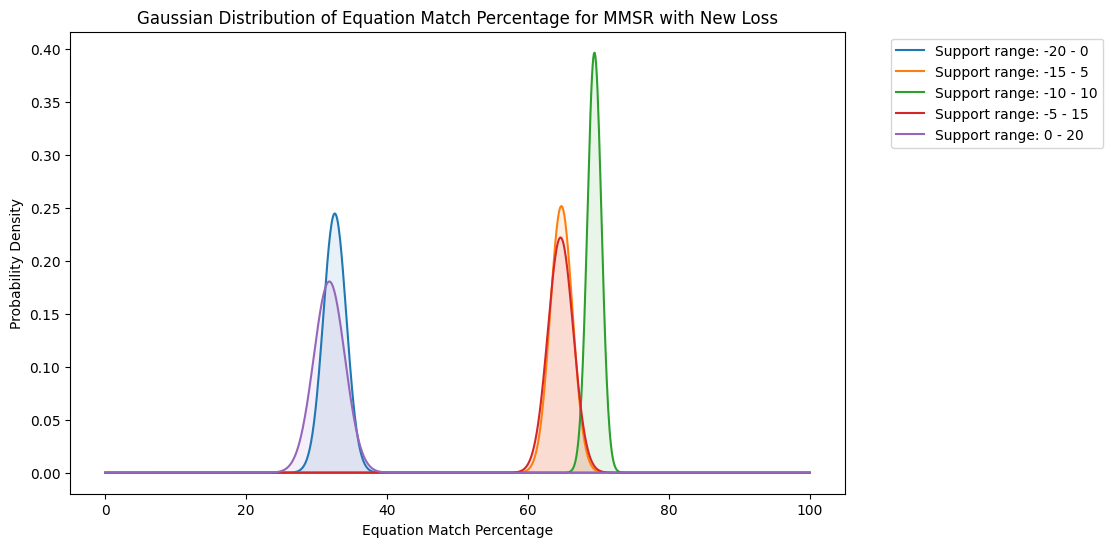

In [58]:
fig = plot_gaussian_distribution(evaluation_summary[evaluation_summary['Model'] == 'mmsr_se5_newloss'], 'MMSR with New Loss')
fig.show()

In [50]:
mmsr_newloss_eval = evaluation_summary[evaluation_summary['Model'] == 'mmsr_se5_oldloss']
mmsr_newloss_eval.head()

,Model,Dataset,Skeleton Encoder Layers,Loss Version,Minimum Support,Maximum Support,Total Entries,Match Sum,Match Percentage
335,mmsr_se5_oldloss,train_nc,5.0,old,-10,10,279,194,69.53405
336,mmsr_se5_oldloss,train_nc,NaN,old,-10,10,279,194,69.53405


/tmp/ipykernel_1534362/1623893527.py:17: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


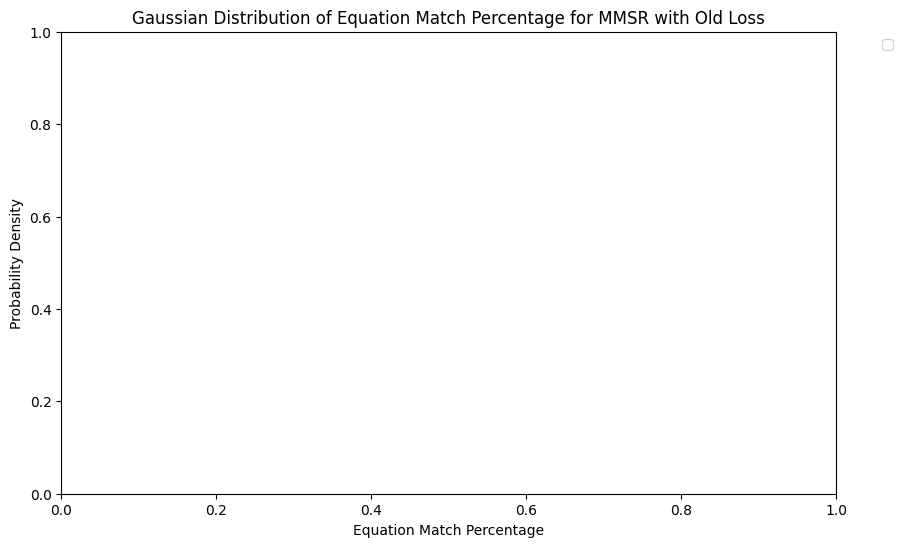

In [51]:
fig = plot_gaussian_distribution(evaluation_summary[evaluation_summary['Model'] == 'mmsr_se5_oldloss'], 'MMSR with Old Loss')
fig.show()

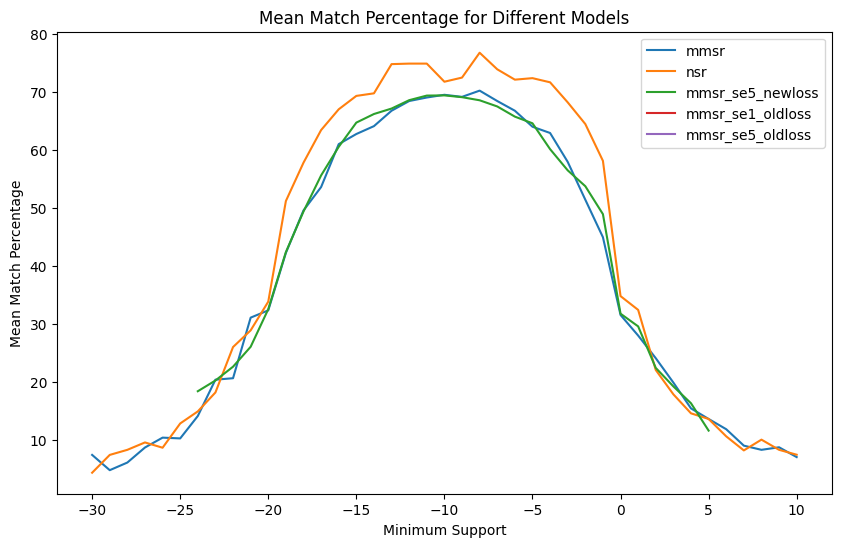

In [80]:
fig = plot_mean_match_percentage(evaluation_summary)
fig.show()

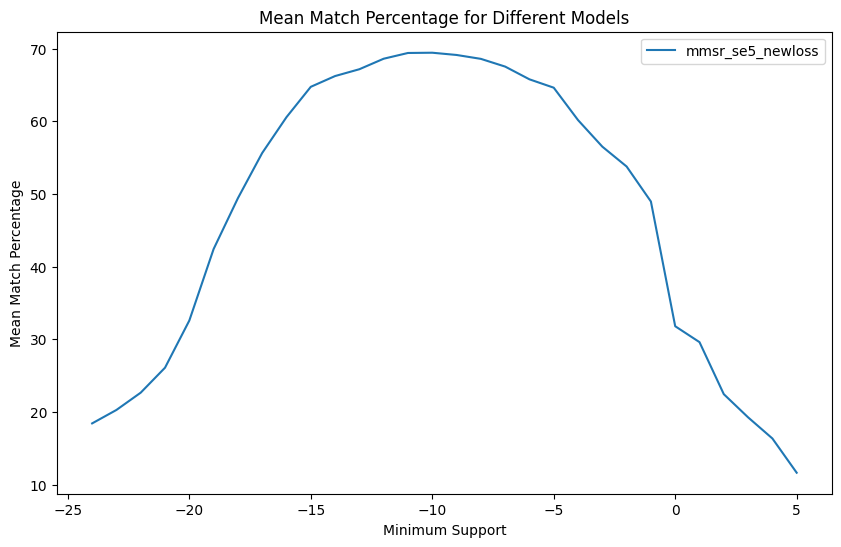

In [78]:
fig = plot_mean_match_percentage(evaluation_summary[evaluation_summary['Model'] == 'mmsr_se5_newloss'])
fig.show()

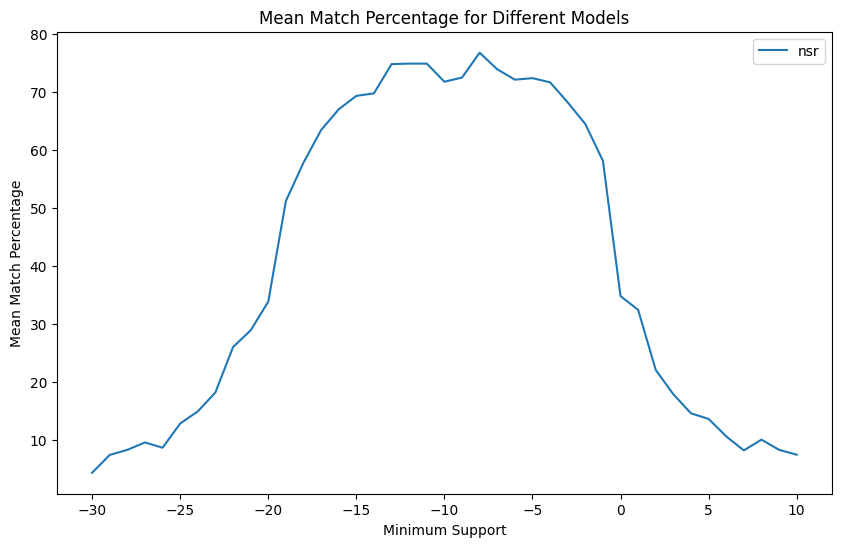

In [81]:
fig = plot_mean_match_percentage(evaluation_summary[evaluation_summary['Model'] == 'nsr'])
fig.show()